# Auxiliar 3: Término colisional y distancias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

El objetivo de este auxiliar es repasar lo visto en el pasado y graficar la **distancia angular** y la **distancia de luminosidad**.

In [2]:
import camb

### Paso 1: definir la cosmología

In [3]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [4]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau) # set_cosmology nos permite guardar los valores antes definidos

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [5]:
# Ahora, para obtener resultados podemos simplemente llamar a otro objeto de camb

results = camb.get_results(pars)

## Paso 2: Definir distancias

In [6]:
help(results.luminosity_distance)

Help on method luminosity_distance in module camb.results:

luminosity_distance(z) method of camb.results.CAMBdata instance
    Get luminosity distance from to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer functions or
    power spectra.
    
    :param z: redshift or array of redshifts
    :return: luminosity distance (matches rank of z)



In [7]:
help(results.angular_diameter_distance)

Help on method angular_diameter_distance in module camb.results:

angular_diameter_distance(z) method of camb.results.CAMBdata instance
    Get (non-comoving) angular diameter distance to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer
    functions or power spectra.
    
    :param z: redshift or array of redshifts
    :return: angular diameter distances, matching rank of z



In [8]:
zs = np.linspace(0, 10, 1_000)

D_ang = results.angular_diameter_distance(zs)
D_lum = results.luminosity_distance(zs)

Text(0, 0.5, 'd [Mpc]')

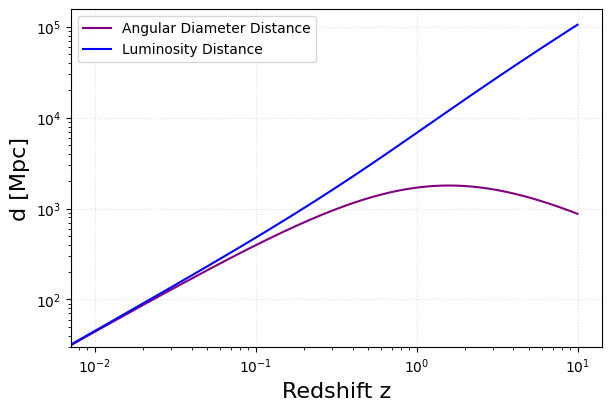

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, D_ang, color='purple', label='Angular Diameter Distance')
ax.loglog(zs, D_lum, color='b', label='Luminosity Distance')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel('Redshift z', fontsize=16)
ax.set_ylabel('d [Mpc]', fontsize=16)

## Hágalo usted mismx:

Comparar lo obtenido con CAMB, con la solución analítica. Para la solución analítica, es recomendable definir las funciones dependiendo de los parámetros cosmológicos $\Omega_a$, para que puedan ver cómo cambian sus resultados al ir variando estos parámetros.

(Recuerden que el subíndice  hace referencia a evaluar en el tiempo presente, no confundir con la notación de derivadas de GR)

La forma analítica de las distancias es


$$
D_A(z)=\frac{f_K(\chi)}{1+z}, 
\qquad 
D_L(z)=(1+z)\,f_K(\chi).
$$

donde
$$
\chi(z)=\int_0^{z}\frac{dx}{E(x)}, 
\qquad 
E(z)=\frac{H(z)}{H_0}.
$$

La función de curvatura $f_K(\chi)$ es
$$
f_K(\chi)=
\begin{cases}
\dfrac{c}{H_0\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0}>0,\\[10pt]
\dfrac{c}{H_0}\;\chi, & \Omega_{K,0}=0,\\[10pt]
\dfrac{c}{H_0\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0}<0.
\end{cases}
$$

Con un componente de radiación, materia, energía oscura (con ecuación de estado w) y curvatura:
$$
H^2(z)=H_0^2\Big[
\Omega_{r,0}(1+z)^4+\Omega_{m,0}(1+z)^3
+\Omega_{\Lambda,0}(1+z)^{3(1+w)}+\Omega_{K,0}(1+z)^2
\Big].
$$


Donde:
 
 
 
 
 
 
  

 

